## 라이브러리 불러오기

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # 검정에 활용i

<br>
<br>

## 예제 및 실습 데이터 불러오기

In [7]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# 데이터 불러오기2
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# 데이터 불러오기3
df_heights = pd.read_csv('data/heights.csv')
df_heights

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [10]:
# 데이터 불러오기4
df_FuelEffeciency = pd.read_csv('./data/FuelEffeciency.csv')
df_FuelEffeciency

,A,B
0,27.01,26.95
1,20.00,20.44
2,23.41,25.05
3,25.22,26.32
4,30.11,29.56
5,25.55,26.60
6,22.23,22.93
7,19.78,20.23
8,33.45,33.95
9,25.22,26.01


<br>

## 1. Simulation을 이용한 통계 검정의 이해  

### 1.1. [모의실험] 일표본 평균 검정

p-value(유의확률)의 계산과 단측 검정/양측 검정의 이해

#### 1.1.1. 가설 설정 및 유의수준 지정

+ 가설 설정
    + $H_0$: 아들키의 평균은 174이다.  
    + $H_1$: 아들키의 평균은 174보다 크다.

+ 유의 수준(해당 업계/학계의 통용 기준을 활용)
    + 일반적으로 0.05로 설정

#### 1.1.2. 기술 통계량 계산

In [11]:
# 관측치 수
df_heights['son'].count()

1078

In [12]:
# 평균
df_heights['son'].mean()
# np.mean(df_heights['son'])

174.45753692820037

In [13]:
# 표준 편차
df_heights['son'].std()
# np.std(df_heights['son'], ddof=1)

7.1493420461869

#### 1.1.3. 랜덤 데이터를 활용한 분포 생성 예제

numpy의 **random** 모듈의 normal()함수를 활용하여 $H_0$ 기준 가짜 아들키 데이터 10000개 생성 후 평균 분포 확인 가능

In [14]:
h_cnt  = df_heights['son'].count()
h_mean = df_heights['son'].mean()
h_std  = df_heights['son'].std()

In [15]:
# 아들키가 174이라는 가정하에 랜덤으로 아들키 1078개 생성
  ## 실행할 때마다 값이 다름
np.random.normal(174, h_std, h_cnt)

array([183.77621171, 172.29916289, 179.39236429, ..., 181.52757208,
       165.49323313, 153.85909267])

In [16]:
# 가짜 데이터의 평균 값 계산
  ## 실행할 때마다 값이 다름
np.random.normal(174, h_std, h_cnt).mean()

174.06709395246855

In [17]:
# 위의 작업을 10000번 반복하고 평균을 확인
fake_means = []
for i in range(10000):
    fake_means.append(np.random.normal(174, h_std, h_cnt).mean())

In [18]:
fake_means

[173.71155608664563,
 173.99058244859424,
 173.96249718344114,
 173.55800471741136,
 174.06286139225404,
 174.3372525403197,
 174.02001246895625,
 173.78627926069785,
 173.68587395731288,
 173.81224767190648,
 173.95092816457907,
 173.82693669766326,
 173.6907340919278,
 174.10215875677432,
 173.82077644724987,
 173.9137120644829,
 173.84032361301695,
 173.9660279733343,
 174.03586419854972,
 173.96126910967902,
 174.12282355280664,
 173.91969378640385,
 174.14109615416345,
 174.1159826329599,
 173.91037827490246,
 173.98263136526293,
 174.2960862969945,
 173.94518863372045,
 174.12768178137,
 174.07013091998152,
 174.50711510185778,
 173.91588823438832,
 174.12565888522371,
 174.1087270934112,
 173.90108627626233,
 174.14449781795653,
 173.96364430311968,
 173.8469556371258,
 174.2523863019876,
 173.62612993829703,
 173.94833471060824,
 173.97174079861136,
 174.01424137742936,
 173.9580705208583,
 174.31801380893228,
 173.85699663801697,
 174.1988812564119,
 173.67092111596693,
 173.9

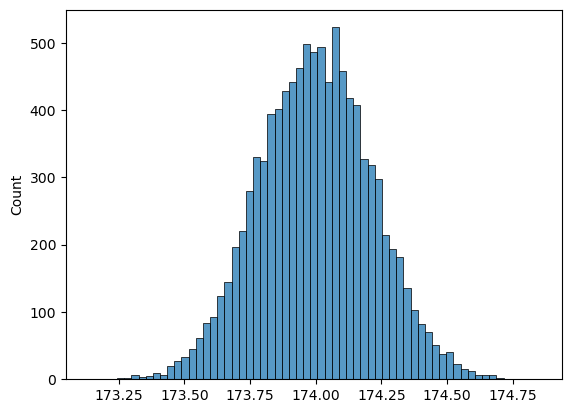

In [19]:
# 히스토그램을 활용한 분포 확인
plot_=sns.histplot(x=fake_means)
#plot_.axvline(h_mean, linewidth=4, color='r')

In [20]:
# 가짜 평균과 실제 평균의 비교
    ## 가짜 평균 10000만개 중에서 실제 평균보다 큰 것의 개수
np.sum(np.array(fake_means) >= h_mean)

176

In [21]:
# p-value의 계산
    ## p-value의 해석: 귀무가설(키 평균이 174) 기준으로 실제 데이터의 평균 174.45가 나올 확률
np.sum(np.array(fake_means) >= h_mean)/10000

0.0176

##### [통계적 결론]
p-value가 0.0xxx로 유의수준 0.05보다 작으므로 $H_1$을 선택  
> "아들키의 평균은 174보다 크다고 할 수 있다"

<br>

### 1.2. [모의실험] 무작위 데이터를 활용한 상관계수 분포 탐색

원본 데이터에서 각 변수의 평균, 표준편차를 계산한 다음 **numpy**의 **random** 모듈의 `normal()`을 활용해 랜덤 데이터를 생성 가능  
이 랜덤 데이터로 관계없는 두 변수의 상관계수의 분포를 계산하고, 실제 상관계수(r=0.501338)의 유의성을 확인 가능

In [22]:
val_n = df_heights['father'].count()
val_fm = df_heights['father'].mean()
val_fs = df_heights['father'].std()
val_sm = df_heights['son'].mean()
val_ss = df_heights['son'].std()
val_n, val_fm, val_fs, val_sm, val_ss

(1078,
 171.92522603599258,
 6.97196576912813,
 174.45753692820037,
 7.1493420461869)

In [23]:
# 가짜 아빠키 변수 생성
father_ = np.random.normal(val_fm, val_fs, val_n)
father_

array([179.37204667, 163.74253021, 171.36852437, ..., 179.80533015,
       178.16082726, 174.71857909])

In [24]:
# 가짜 아들키 변수 생성
son_ = np.random.normal(val_sm, val_ss, val_n)
son_

array([176.90543856, 165.97621343, 163.46908211, ..., 182.31798531,
       182.27175661, 179.7722512 ])

In [25]:
# 가짜 아빠키의 평균과 표준편차
father_.mean(), father_.std()

(172.1973513129634, 7.191230110306182)

In [26]:
# 가짜 아들키의 평균과 표준편차
son_.mean(), son_.std()

(174.00090461720382, 7.292274947409416)

In [27]:
# 의미없는 상관계수의 계산 - 결과는 모두 다름
np.corrcoef(father_, son_)

array([[1.        , 0.04190062],
       [0.04190062, 1.        ]])

In [28]:
# 상관계수 하나만 선택
np.corrcoef(father_, son_)[0,1]

0.04190061989959124

In [29]:
# 위의 작업을 10000번 반복
corr_ = []
for i in range(10000):
    father_ = np.random.normal(val_fm, val_fs, val_n)
    son_ = np.random.normal(val_sm, val_ss, val_n)
    corr_.append(np.corrcoef(father_, son_)[0,1])

<Axes: ylabel='Count'>

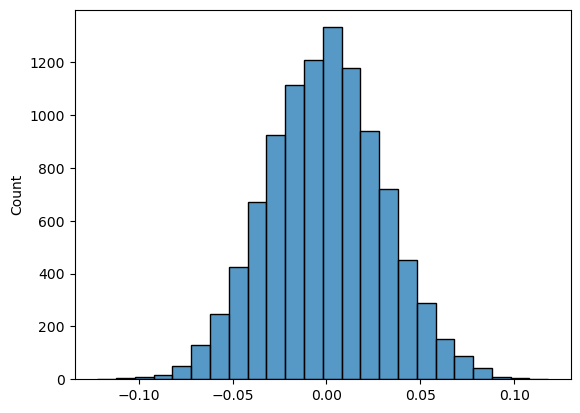

In [30]:
# 의미없는 상관계수 분포
sns.histplot(x=corr_, binwidth=0.01)

(-0.6, 0.6)

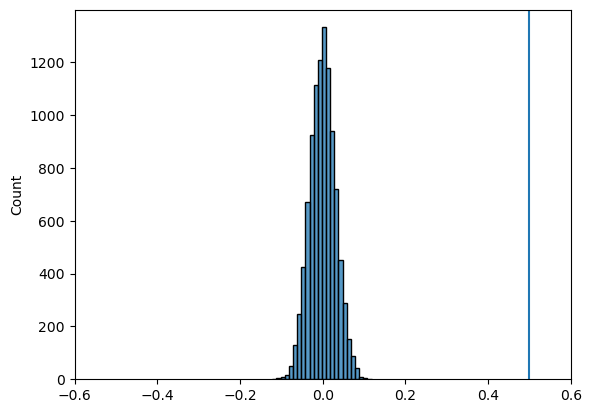

In [31]:
# 실제 데이터에서 얻은 상관계수 표시하기 (r=0.501338)
plot_=sns.histplot(x=corr_, binwidth=0.01)
plot_.axvline(0.5)
plt.xlim([-0.6, 0.6]) # x축 최소와 최대 범위 설정

> **[통계적 결론]**  
> 의미없는 상관계수 분포를 기준으로 실제 상관계수 0.5는 매우 특이한 값이므로 실제 상관계수가 의미가 없다고 보기에는 어렵다.

### 일반적인 검정 절차


#### 1.1.4. 정규성 검정

아들키 변수가 정규분포를 따르는지 Shapiro 검정 등을 활용
+ 가설 설정
    + $H_0$: 아들키는 정규분포를 따른다.
    + $H_1$: 아들키는 정규분포를 따르지 않는다.
+ p-value가 0.05보다 커야 정규분포를 따른다고 볼 수 있음
+ 정규성 가정을 충족하지 못하면 Wilcoxon 검정(비모수 검정) 등을 활용


In [32]:
# 아들 키 정규성 검정
stats.shapiro(df_heights['son'])
  ## p-value 0.0142 < 0.05
  ## "아들 키는 정규분포를 따르지 않는다고 할 수 있다."
  ## --> 분포 가정이 없는 wilcoxon 검정을 수행

ShapiroResult(statistic=0.9964215755462646, pvalue=0.014193939976394176)

In [33]:
# Wilcoxon 부호 순위 검정
stats.wilcoxon(df_heights['son'] - 174, alternative='greater')
  ## p-value 0.0175 < 0.05
  ## "아들 키는 174보다 크다고 할 수 있다."

WilcoxonResult(statistic=312342.0, pvalue=0.01752235132129079)

In [34]:
# 아빠 키 정규성 검정
stats.shapiro(df_heights['father'])
  ## p-value 0.1966 > 0.05
  ## "아빠 키는 정규분포를 따른다고 할 수 있다."
  ## --> 아래의 z검정 혹은 t검정 활용

ShapiroResult(statistic=0.9979115128517151, pvalue=0.19646644592285156)

#### 1.1.5. z검정/t검정 선택

+ 가설 재확인
    + $H_0$: 아들키의 평균은 174이다.  = (아들키-174)의 평균은 0이다.
    + $H_1$: 아들키의 평균은 174보다 크다. = (아들키-174)의 평균은 0보다 크다.

+ One-sample z-test(일변량 z검정, z분포 활용)
    + 모분산을 알고 있거나 표본의 크기가 충분히 큰 경우
+ One-sample t-test(일변량 t검정, t분포 활용)
    + 모분산을 모른다고 가정할 경우

#### 1.1.6. 검정 실행

In [36]:
# One-sample t-test
stats.ttest_1samp(df_heights['son'], popmean=174, alternative='greater')
    ## p-value가 유의수준 0.05보다 작으므로 대립가설 선택

TtestResult(statistic=2.1012099902448504, pvalue=0.017927222148374933, df=1077)

#### 1.1.7. 양측 검정의 활용

가설 설정에 따라 양측 검정 활용 가능

+ 가설 설정
    + $H_0$: 아들키의 평균은 174이다.  
    + $H_1$: 아들키의 평균은 174이 아니다. -> 양측검정(two-tailed/two-sided test)


In [37]:
# One-sample t-test(two-sided)
stats.ttest_1samp(df_heights['son'], popmean=174, alternative='two-sided')
    ## one-sided p-value의 두배

TtestResult(statistic=2.1012099902448504, pvalue=0.03585444429674987, df=1077)

<br>
<hr>
<br>

## 2. 두 그룹의 평균 차이에 대한 검정
### 2.1 독립 표본 t-검정

+ 가설 설정
    + $H_0: \mu_X = \mu_Y$    (두 그룹 $X$, $Y$의 평균이 같다.)
    + $H_1: \mu_X \neq \mu_Y$    (두 그룹 $X$, $Y$의 평균이 다르다.)

+ 유의수준 설정: 0.05
+ 정규성 검정(생략)
+ 검정 방법 선택
    + 독립표본 t검정 활용

In [ ]:
# 세대별 키 평균 계산
df_heights.mean()

In [ ]:
# 정규성 검정을 통과했다고 가정

# ttest_ind() 함수를 활용하여 아빠들의 키와 아들들의 키의 차이에 대한 검정
    ## "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."
stats.ttest_ind(df_heights['father'], df_heights['son'], alternative = 'two-sided')

#### [참고] 정규성 검정과 비모수 검정

In [39]:
# 각 변수의 정규성 검정
stats.shapiro(df_heights['son'])
# stats.shapiro(df_heights['father'])
    ## 아들 키는 정규성 가정을 충족하지 못함
    ## --> 분포 가정이 없는 Kruskal-Wallis 순위합 검정 수행

ShapiroResult(statistic=0.9964215755462646, pvalue=0.014193939976394176)

In [40]:
stats.shapiro(df_heights['father'])

ShapiroResult(statistic=0.9979115128517151, pvalue=0.19646644592285156)

In [41]:
# 비모수 검정
stats.kruskal(df_heights['father'], df_heights['son'])
    ## "아빠키와 아들키에는 유의미한 차이가 있다고 할 수 있다."
    ## Kruskal-Wallis 검정은 세 그룹 이상의 평균 비교(ANOVA)에서도 활용

KruskalResult(statistic=64.2712657832806, pvalue=1.0841541123431389e-15)

<br>

#### [실습] 두 그룹의 평균 비교 및 검정

1. 아래의 명령어를 실행하고 '남자수학점수'와 '여자수학점수' 데이터를 생성
2. *np.mean()* 을 활용하여 성별 평균 수학점수를 각각 계산
3. *stats.ttest_ind()* 를 활용하여 두 그룹 평균 차이의 유의성에 대한 검정 수행

In [42]:
#df_sp에서 남학생 수학점수와 여학생 수학점수를 추출하고,  np.array로 변환
math_male = np.array(df_sp[df_sp['gender']=='male']['math score'])
math_female = np.array(df_sp[df_sp['gender']=='female']['math score'])
# math_male
# math_female

In [45]:
#성별 수학점수의 평균 계산하기
np.mean(math_male)
np.mean(math_female)

68.72821576763485

In [47]:
#독립 표본 t-검정 실시

    ## "남학생 수학점수와 여학생 수학점수에는 유의미한 차이가 있다고 할 수 있다."
stats.ttest_ind(math_male, math_female)

TtestResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08, df=998.0)

###  2.2 대응 표본 t-검정

사전테스트점수-사후테스트점수 등 각 관측치의 두 변수값 차이에 대한 검정

+ 가설 설정
    + $H_0: \mu_X - \mu_Y = 0$    (두 그룹 $X$, $Y$의 평균은 차이가 없다.)
    + $H_1: \mu_X - \mu_Y \neq 0$    (두 그룹 $X$, $Y$의 평균은 차이가 있다.)

+ 유의수준 설정: 0.05
+ 정규성 검정(생략)
+ 검정 방법 선택
    + 대응 표본 t검정 활용

In [48]:
#택시 10대에서 A사 연료와 B사 연료에 대한 연비에 차이가 있는지 검정
#df_FuelEffeciency 데이터를 이용
df_FuelEffeciency

,A,B
0,27.01,26.95
1,20.00,20.44
2,23.41,25.05
3,25.22,26.32
4,30.11,29.56
5,25.55,26.60
6,22.23,22.93
7,19.78,20.23
8,33.45,33.95
9,25.22,26.01


In [49]:
#각 대응 표본에 대해서 차이 d를 구하여 df_FuelEffeciency['d']에 추가
df_FuelEffeciency['d'] = df_FuelEffeciency.A-df_FuelEffeciency.B
df_FuelEffeciency

,A,B,d
0,27.01,26.95,0.06
1,20.00,20.44,-0.44
2,23.41,25.05,-1.64
3,25.22,26.32,-1.10
4,30.11,29.56,0.55
5,25.55,26.60,-1.05
6,22.23,22.93,-0.70
7,19.78,20.23,-0.45
8,33.45,33.95,-0.50
9,25.22,26.01,-0.79


In [50]:
#각 대응 표본의 차이(d)가 정규성을 만족하는지 검사
stats.shapiro(df_FuelEffeciency['d'])

ShapiroResult(statistic=0.9738283157348633, pvalue=0.9238941669464111)

In [51]:
#대응 표본이므로 stats.ttest_rel() 함수를 이용
stats.ttest_rel(df_FuelEffeciency['A'], df_FuelEffeciency['B'], alternative = 'two-sided')


TtestResult(statistic=-3.1196615512720802, pvalue=0.012325349247526556, df=9)

In [53]:
#독립 표본으로 오인해서 독립 표본 t-검정을 했을 경우
stats.ttest_ind(df_FuelEffeciency['A'], df_FuelEffeciency['B'], alternative = 'two-sided')

# 차이없다 (귀무가설 인정)>> 그릇된 의사 결정임

TtestResult(statistic=-0.3237140279778471, pvalue=0.7498854873075436, df=18.0)

#### [참고] paired data 그림으로 표현하기 (`pingouin 라이브러리` 활용)

In [ ]:
# pinqouin 라이브러리 불러오기
import pingouin as pg

In [ ]:
# wide 형태가 아닌 long 형태의 데이터 불러오기
df_FE = pd.read_csv('./data/FuelEffeciency_long.csv')
df_FE

In [ ]:
# 일반적인 형태의 상자그림(boxplot) 그리기
sns.boxplot(df_FE, x='Gas', y='FuelEffeciency')

In [ ]:
# 상자그림에 각각 대응되는 데이터 점들을 선으로 이은 그래프를 같이 표시
    # 전보다 후에 값이 증가되는 경우 선을 초록색으로 표시
    # 전보다 후에 값이 감소하는 경우 선을 빨간색으로 표시
pg.plot_paired(data=df_FE, dv='FuelEffeciency', within='Gas', subject='ID')

<br>
<hr>
<br>

## 3. 그룹 평균과 분산분석

수치형 변수와 범주형 변수의 관계를 파악하기 위해서 그룹별 평균을 계산하고 그룹별 상자그림을 그려서 분포를 비교  
평균 비교의 연장에서 그룹간 평균이 유의미하게 다른지 확인하기 위해서 분산분석, ANOVA를 활용

+ 가설 설정
    + $H_0: \mu_1 = \mu_2 = ... = \mu_k$  (모든 그룹의 평균이 동일하다.)
    + $H_1: Not\,H_0$    (적어도 두 그룹의 평균이 다르다,)

+ 유의수준 설정: 0.05
+ 각 그룹별 정규성 검정(생략)
+ 등분산 검정
    + $H_0:$ 각 그룹의 분산이 모두 동일하다.  
    + $H_1: Not\,H_0 $  

+ 검정 방법 선택
    + F검정

In [54]:
# 전체 평균
df_ins['charges'].mean()

13270.422265141257

In [55]:
# 그룹별 평균 계산
df_ins.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<Axes: xlabel='region', ylabel='charges'>

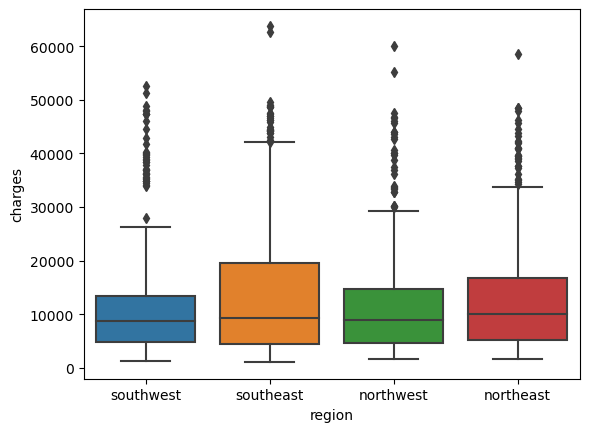

In [56]:
# 그룹별 상자그림 활용 분포 비교
sns.boxplot(data=df_ins,
            x='region',
            y='charges')

<br>

### 3.1. scipy를 활용한 분산분석

scipy를 활용한 분산분석에서는 데이터를 그룹별로 분할한 다음, `f_oneway()`를 활용

In [57]:
# 그룹별 데이터 분할
g1 = df_ins[df_ins['region']=='northeast']['charges']
g2 = df_ins[df_ins['region']=='northwest']['charges']
g3 = df_ins[df_ins['region']=='southeast']['charges']
g4 = df_ins[df_ins['region']=='southwest']['charges']

In [58]:
# 정규성 검정
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3), stats.shapiro(g4)
    ## "정규분포를 따르지 않는다고 할 수 있다" -> 비모수 검정
    ## 정규성 가정하고 아래의 등분산 검정 수행

(ShapiroResult(statistic=0.8353428840637207, pvalue=6.552730011610829e-18),
 ShapiroResult(statistic=0.8128032684326172, pvalue=4.268387928586811e-19),
 ShapiroResult(statistic=0.8242298364639282, pvalue=1.23268419436607e-19),
 ShapiroResult(statistic=0.7842952609062195, pvalue=2.023667803366432e-20))

In [59]:
# 등분산 검정
stats.bartlett(g1, g2, g3, g4)
    ## "분산이 다르다고 할 수 있다." -> Welch ANOVA 활용
    ## 등분산을 가정하고 아래의 ANOVA 수행

BartlettResult(statistic=25.882548015902767, pvalue=1.0092988086670753e-05)

In [60]:
# 분산분석 실행
stats.f_oneway(g1,g2,g3,g4)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

> **[통계적 결론]**  
> 네 지역의 charges의 평균에는 유의미한 차이가 있다고 할 수 있다.

<br>

### 3.2. statsmodels를 활용한 분산분석

매번 데이터를 분할하는 것은 쉽지 않기 때문에 **statsmodels** 라이브러리 활용 추천

In [61]:
# import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [62]:
model = ols('charges ~ C(region)', df_ins).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335866e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


<br>

### 3.3 사후 분석 (Post-hoc test)

분산분석은 그룹간의 유의미한 평균차이가 있다는 것만 알 수 있고, 어떤 그룹 간 차이가 유의미한지 파악하기 위해서 사후 분석/사후 검정을 수행. Bonferroni 수정, Fisher' LSD, Tuckey' HSD, Scheffe의 방법 등이 있음.   
  - Bonferroni 수정 - 모든 가능한 두 그룹 조합 별 t검정을 활용, 가장 일반적인 방법
  - Tuckey' HSD - 비교 집단간 표본크기가 동일한 경우 사용, t분포 활용

In [ ]:
# Bonferroni 사후 검정
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_ins['charges'], df_ins['region'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf", )
tbl

In [ ]:
# Tuckey' HSD 검정
tbl2=comp.tukeyhsd()
tbl2.summary()

<br>

#### [참고] 이원 분산분석 (2-way ANOVA)

In [ ]:
model = ols('charges ~ C(region)*C(sex)', df_ins).fit()
anova_lm(model)

In [ ]:
sns.barplot(df_ins, x='sex', y='charges')

In [ ]:
sns.barplot(df_ins, x='region', y='charges')

In [ ]:
sns.barplot(df_ins, x='region', y='charges', hue='sex')

<br>
<br>

#### [실습]
1. 데이터 df_sp에서 `gender`별 `math score`의 평균을 계산하고 상자그림 그리기
2. 1.의 두 변수를 활용해서 **scipy** 라이브러리로 분산분석 수행하기
3. 데이터 df_sp에서 `parental level of education`별 `reading score`의 평균 계산하고 막대그림 그리기
4. 3.의 두 변수를 활용해서 **statsmodels**로 분산분석 수행하기
5. 4에서의 결과가 통계적으로 유의하다면 `bonferroni 방법으로` **사후 분석(post hoc test)** 실시하기

In [ ]:
# 1. 데이터 df_sp에서 `gender`별 `math score`의 평균을 계산하고 상자그림 그리기

<Axes: xlabel='gender', ylabel='math score'>

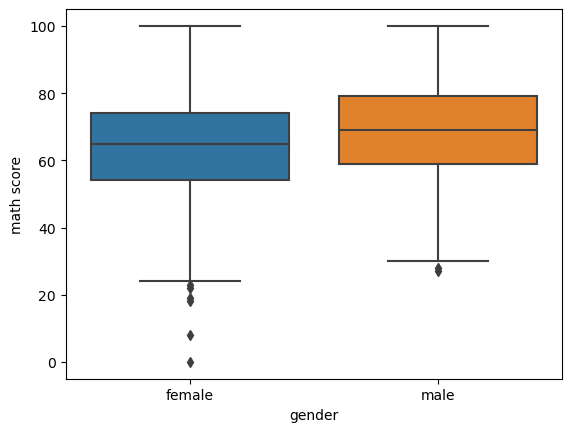

In [64]:
df_sp.groupby('gender')['math score'].mean()
sns.boxplot(data=df_sp,
            x='gender',
            y='math score')

In [69]:
# 'math score' 데이터 'gender'별로 분리
df_sp_male=df_sp[df_sp['gender']=='male']['math score']
df_sp_female=df_sp[df_sp['gender']=='female']['math score']
df_sp_male, df_sp_female

(3      47
 4      76
 7      40
 8      64
 10     58
        ..
 985    57
 987    81
 990    86
 994    63
 996    62
 Name: math score, Length: 482, dtype: int64,
 0      72
 1      69
 2      90
 5      71
 6      88
        ..
 993    62
 995    88
 997    59
 998    68
 999    77
 Name: math score, Length: 518, dtype: int64)

In [66]:
# 각 데이터에 대한 정규성 검증
stats.shapiro(df_sp_male), stats.shapiro(df_sp_female)
    #정규성을 만족하는 것으로 가정(사실은 p<0.05이므로 아니지만)

(ShapiroResult(statistic=0.9935628175735474, pvalue=0.03795437887310982),
 ShapiroResult(statistic=0.9911776185035706, pvalue=0.0035106909926980734))

In [67]:
# 각 데이터에 대한 등분산성 검증
stats.bartlett(df_sp_male, df_sp_female)
# p>0.05이므로 아슬아슬하게 통과임

BartlettResult(statistic=2.8752171755105014, pvalue=0.08995283913923485)

In [70]:
stats.ttest_ind(df_sp_male, df_sp_female)

TtestResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08, df=998.0)

In [68]:
# 2. 1.의 두 변수를 활용해서 scipy 라이브러리로 분산분석 수행하기
stats.f_oneway(df_sp_male, df_sp_female)
# p<0.05이니까... 둘간의 차이는 '유의'하다.

F_onewayResult(statistic=28.979336095030884, pvalue=9.120185549332254e-08)

<Axes: xlabel='reading score', ylabel='parental level of education'>

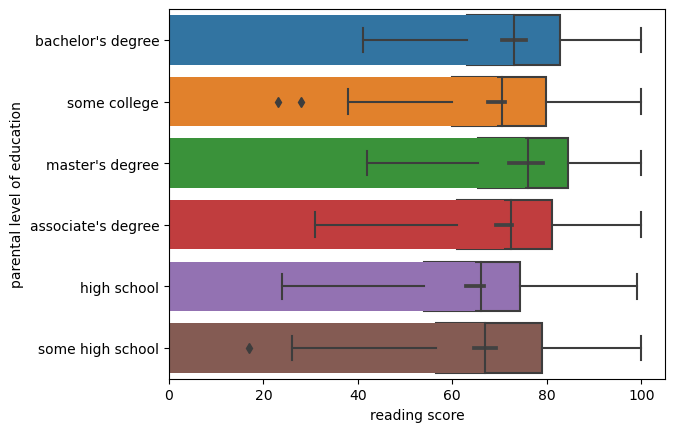

In [75]:
# 3. 데이터 df_sp에서 `parental level of education`별 `reading score`의 평균 계산하고 막대그림 그리기
df_sp.groupby('parental level of education')['reading score'].mean()

sns.barplot(data=df_sp, y='parental level of education', x='reading score')

sns.boxplot(data=df_sp, y='parental level of education', x='reading score')

In [83]:
# 3.의 두 변수를 활용해서 statsmodels로 분산분석 수행하기
model2=ols('Q("reading score")~C(Q("parental level of education"))',df_sp).fit()

# Q는 공백 없애는 것
anova_lm(model2)


,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""parental level of education""))",5.0,9506.493193,1901.298639,9.2894,1.168246e-08
Residual,994.0,203445.945807,204.673990,NaN,NaN


In [ ]:
# 5. 4에서의 결과가 통계적으로 유의하다면 `bonferroni 방법으로` **사후 분석(post hoc test)** 실시하기


<br>
<hr>
<br>

## 4. 상관계수와 검정(상관분석)

In [ ]:
# 키 데이터
df_heights.head()

In [ ]:
# pandas의 corr()을 활용한 상관계수 계산
df_heights.corr()

In [ ]:
# numpy의 corrcoef()를 활용한 상관계수 계산
np.corrcoef(df_heights['father'], df_heights['son'])

<br>

### 4.1. t분포를 활용한 상관분석

#### 4.1.1. t값의 계산과 p-value 계산

상관계수와 관측치 수를 활용해서 t값을 계산하고 t분포를 활용해서 p-value를 계산 가능

In [ ]:
# 실제 상관계수 계산
corr_actual = np.corrcoef(df_heights['father'], df_heights['son'])[0,1]
corr_actual

In [ ]:
# 수식에 따라 t값 계산
t_actual = corr_actual/np.sqrt(1-corr_actual**2)*np.sqrt(val_n-2)
t_actual

In [ ]:
# [참고] t분포 확인
x = np.linspace(-4, 4, 100)
rv = stats.t(df=val_n - 2)
sns.lineplot(x=x, y=rv.pdf(x))

In [ ]:
# p-value 계산
    ## 귀무가설 기준으로 상관계수 0.5가 나올 확률은 0.00.......... 이다.
(1-rv.cdf(t_actual))*2

<br>

#### 4.1.2. scipy를 활용한 상관분석

scipy의 stats 모듈을 활용해 상관분석 가능

In [ ]:
# 상관계수 계산 및 p-value 계산
res = stats.pearsonr(df_heights['father'], df_heights['son'])
res

In [ ]:
# [참고] 상관계수의 95% 신뢰구간
res.confidence_interval()

> **[통계적 결론]**  
> 유의수준 0.05에서 p-value가 유의수준보다 작으므로 귀무가설을 기각할 수 있다.  
> 따라서 아빠키와 아들키는 유의미한 양의 상관을 가진다고 할 수 있다.  

<br>

#### [실습] 두 수치형 변수의 관계 탐색

1. **df_sp**에서 'math score'와 'reading score'의 산점도 그리고 상관분석하기
2. **df_ins**에서 'bmi'와 'charges'의 산점도를 그리고 상관분석하기
3. df_ins에서 아래의 명령어를 실행하고 smoker별 분할 데이터로 bmi와 charges의 상관분석하기

In [ ]:
# 1. df_sp에서 'math score'와 'reading score'의 산점도 그리고 상관분석하기


In [ ]:
# 2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관분석하기


In [ ]:
# 3. df_ins에서 아래의 명령어를 실행하고 smoker별 분할 데이터로 bmi와 charges의 상관분석하기


In [ ]:
# 3. 분할 데이터 생성 - 흡연여부에 따른 관측치 분할
df_ins_smoker    = df_ins[df_ins['smoker'] == 'yes']
df_ins_nonsmoker = df_ins[df_ins['smoker'] == 'no']

In [ ]:
# smoker별 분할 데이터로 'bmi', 'charges'의 상관분석하기


<br>
<br>
<br>

## 5. 두 범주형 변수의 교차표와 독립성 검정

두 범주형 변수의 집계에서 교차표를 활용  
행/열 백분율로 두 변수의 관계를 탐색했던 것의 연장선에서 독립을 가정한 교차표를 활용해 두 변수의 관계가 통계적으로 유의미한지 판단 가능

In [ ]:
# 교차표 및 열지도
agg = pd.crosstab(df_ins['sex'], df_ins['smoker'])
agg

In [ ]:
sns.heatmap(agg, cmap='Blues', annot=True, fmt='d')

In [ ]:
# 행 백분율과 열 백분율
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index', margins=True)

In [ ]:
pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)

<br>

### 5.1. chi2_contingency()를 활용한 독립성 검정

scipy의 stats 모듈에서 *chi2_contingency()* 를 활용해 교차표의 두 범주형 변수에 대한 독립성 검정 실행

In [ ]:
# 독립성 검정
    # 결과값 순서
    # 1. 카이제곱값
    # 2. p-value
    # 3. 자유도(degree of freedum)
    # 4. 독립을 가정한 교차표


In [ ]:
# [참고] 결과값의 분할 저장
chi2val, pvalue, _, _ = stats.chi2_contingency(agg)
pvalue

<br>
<br>

#### [실습] 두 범주형 변수의 독립성 검정

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들고 열지도 시각화하기
2. 1.의 교차표에서 행 백분율, 열 백분율 계산하고 의미 파악하기
3. 1.의 교차표와 `chi2_contingency()`로 'race/ethnicity'와 'parental level of education'의 독립성 검정하기




In [ ]:
# 1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들고 열지도 시각화하기


In [ ]:
# 2. 1.의 교차표에서 행 백분율, 열 백분율 계산하고 의미 파악하기


In [ ]:
# 3. 1.의 교차표와 `chi2_contingency()`로 'race/ethnicity'와 'parental level of education'의 독립성 검정하기


<br>
<br>
<br>

## 6. 통계 검정의 한계

### 6.1. 관측치 개수에 따른 유의성 차이

일반적으로 통계 검정은 관측치 수가 많아지면 대부분 귀무가설을 기각


In [ ]:
# 반복을 통한 벡터 생성
np.repeat([8,9,10], 3)

In [ ]:
# 세 그룹 데이터 생성
a = np.repeat([1000,1001,1002], 10)
b = np.repeat([1000,1001,1003], 10)
c = np.repeat([1000,1001,1004], 10)
np.mean(a), np.mean(b), np.mean(c)

In [ ]:
# 분산 분석 수행
stats.f_oneway(a,b,c)

In [ ]:
# 관측치가 각 100개인 세 그룹 데이터 생성
a = np.repeat([1000,1001,1002], 100)
b = np.repeat([1000,1001,1003], 100)
c = np.repeat([1000,1001,1004], 100)
np.mean(a), np.mean(b), np.mean(c)

In [ ]:
# 분산 분석 수행
stats.f_oneway(a,b,c)

<br>
<br>

### 6.2. 단편적인 변수 활용의 한계

검정을 통해서 특정 변수의 유의성을 확인했다하더라도 일반화하기 어려움  

In [ ]:
# 성별 평균 계산
df_ins.groupby('sex')['charges'].mean()

In [ ]:
# 성별 평균 차이의 유의성 검정
    ## 성별에 따른 평균차이가 유의함
model = ols('charges ~ C(sex)', df_ins).fit()
anova_lm(model)

In [ ]:
# 흡연여부/성별 평균 계산
df_ins.groupby(['sex', 'smoker'])['charges'].mean()

In [ ]:
# 유의성 검정
    ## 성별에 따른 차이는 유의미하지 않음
model = ols('charges ~ C(smoker)*C(sex)', df_ins).fit()
anova_lm(model)

#### End of script